In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import diffusions as func
import PM_1D_dirichlet as D1
import PM_2D_dirichlet as D2

In [3]:
from schemes import diffX1D, diffX, diffY

## 2D

## Diff Functions

In [4]:
def f(x, alpha, scale = 0.1):
    first = 5-np.tanh(alpha*(x-1/6))-np.tanh(alpha*(x-2/6))
    second = np.tanh(alpha*(x-4/6)) + np.tanh(alpha*(x-5/6)) + scale*(np.sin(25*x))**2*np.sin(300*x)
    return first + second

dt < :  1.25e-05
Endtime:  1.0


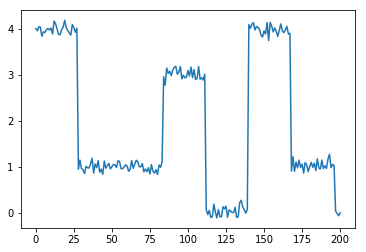

In [5]:
M = 199

x = np.linspace(0, 1, M+2)
# x = np.linspace(0, 6, M+2)

dx = 1/(M+1)

print("dt < : ", 1/(2/dx**2))

T = 10000
# dt = 1e-4
dt = 1/T

x = np.linspace(0, 1, M+2)
# u0 = f(x, 300, scale = 0.02)
# x = np.linspace(0, 6, M+2)
# u0 = D1.f(x, 30, scale = 0.2)

u0 = D1.generate_random1D(M, scale = 0.1)
print("Endtime: ", T * dt)

plt.plot(u0)
plt.show()

In [6]:
funcname = "rational"
g = func.choose_function(funcname, c = 1)
U_rat = D1.solve_BE(u0, g, M, T, dt)

In [7]:
# funcname = "exponential"
# g = func.choose_function(funcname, c = 10)
# U_exp = D1.solve_BE(u0, g, M, T, dt)

In [8]:
funcname = "weickert"
g = func.choose_function(funcname, c = 1)
U_weick = D1.solve_BE(u0, g, M, T, dt)

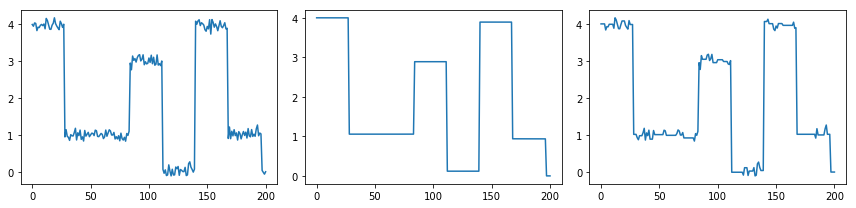

In [9]:
plt.figure(figsize=(12,3))

plt.subplot(131)
plt.plot(U_rat[0])

# plt.subplot(432)
# plt.plot(U_exp[0])
# plt.subplot(435)
# plt.plot(U_exp[T//3])
# plt.subplot(438)
# plt.plot(U_exp[2*T//3])
# plt.subplot(4, 3, 11)
# plt.plot(U_exp[-1])

plt.subplot(132)
plt.plot(U_rat[-1])
plt.subplot(133)
plt.plot(U_weick[-1])
plt.tight_layout()
plt.savefig("./figures/compare_diffusions.png")
plt.show()

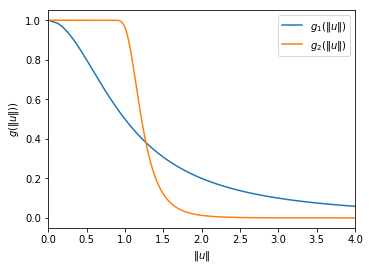

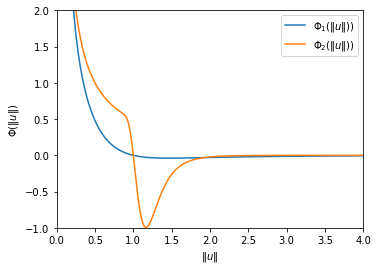

In [10]:
M = 999
domain = (0, 16)
s = np.linspace(*domain, M+2)
Dx = diffX1D(M, domain)

plt.figure(figsize = (5.5, 4))
# plt.subplot(121)
plt.plot(s**(1/2), func.rational(c = 1)(s), label = r"$g_1 \left( \Vert u \Vert \right)$")
# plt.plot(s, func.exponential(c = 1)(s**(1/2)), label = "Exponential")
plt.plot(s**(1/2), func.weickert(c = 1)(s), label = r"$g_2 \left( \Vert u \Vert \right)$")
plt.legend()
plt.xlim(domain[0]**(1/2), domain[1]**(1/2))
plt.xlabel(r"$\Vert u \Vert$")
plt.ylabel(r"$g\left(\Vert u \Vert)\right)$")
plt.legend()
plt.savefig("./figures/diffusion_a.png")


plt.figure(figsize = (5.5, 4))
plt.plot(s**(1/2), Dx.dot(func.flux(func.rational, c = 1)(s)), label = r"$\Phi_1 \left( \Vert u \Vert \right))$")
# plt.plot(s, Dx.dot(func.flux(func.exponential, c = 1)(s)**(1/2)), label = r"exponential")
plt.plot(s**(1/2), Dx.dot(func.flux(func.weickert, c = 1)(s)), label = r"$\Phi_2 \left( \Vert u \Vert \right))$")
plt.ylim(-1, 2)
plt.xlim(domain[0]**(1/2), domain[1]**(1/2))
plt.xlabel(r"$\Vert u \Vert$")
plt.ylabel(r"$\Phi \left( \Vert u \Vert \right)$")

plt.legend()
plt.savefig("./figures/diffusion_b.png")

plt.show()

## Edge Detection

### Weickert

In [11]:
M, N = 254, 254
K = (M+2)*(N+2)
dx, dy = 1/(M+1), 1/(N+1)

T = 10000
# dt = 1e-2
dt = 1/T

print("Endtime: ", T*dt)
print("dt <", 1/(2/dx**2 + 2/dy**2))


imname = "lena-256x256.jpg"
I = D2.load_image("./images/"+ imname, (M+2, N+2))
# I = D2.add_noise2D(I, scale = 30)

# funcnum = 1
# g = func.choose_function(funcnum, c = 1)
# U_rat = D2.solve_BE(I.reshape(K), g, M, N, T, dt, True)

funcnum = 5
g = func.choose_function(funcnum, c = 5)
U_weick = D2.solve_BE(I.reshape(K), g, M, N, T, dt, False)

# funcnum = 0
# g = func.choose_function(funcnum, c = 0.01)
# U_heat= D2.solve_BE(I.reshape(K), g, M, N, T, dt, True)

# plt.figure(figsize = (20, 14))
# plt.subplot(221)
# plt.imshow(I, cmap = "gray")
# plt.subplot(222)
# plt.imshow(D2.array_to_image(U_rat[-1], N+2, M+2), cmap = "gray")
# plt.subplot(223)
# plt.imshow(D2.array_to_image(U_weick[-1], N+2, M+2), cmap = "gray")
# plt.subplot(224)
# plt.imshow(D2.array_to_image(U_heat[-1], N+2, M+2), cmap = "gray")
# plt.tight_layout()
# plt.savefig("./figures/comparison_2D.png")

Endtime:  1.0
dt < 3.844675124951941e-06


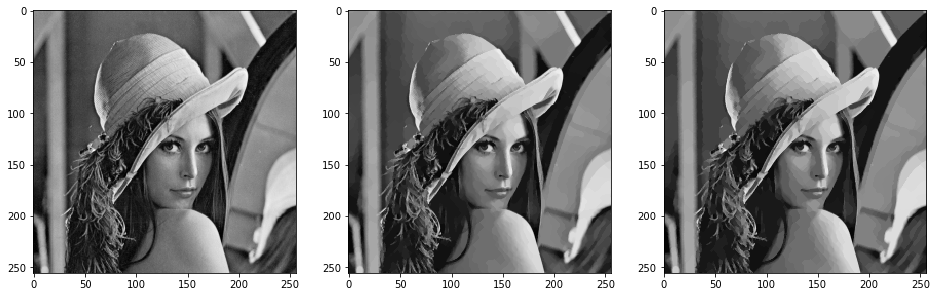

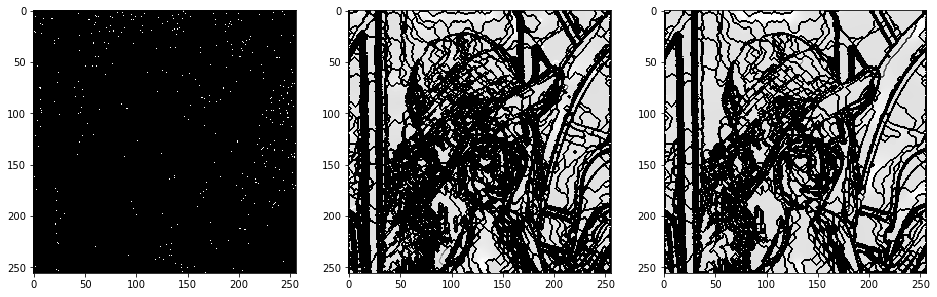

In [12]:
plt.figure(figsize = (16, 6))
plt.subplot(131)
plt.imshow(D2.array_to_image(U_weick[0], N+2, M+2), cmap = "gray")
plt.subplot(132)
plt.imshow(D2.array_to_image(U_weick[T//2], N+2, M+2), cmap = "gray")
plt.subplot(133)
plt.imshow(D2.array_to_image(U_weick[-1], N+2, M+2), cmap = "gray")
plt.show()

Dx = diffX(M, N)
Dy = diffY(M, N)

G0 = g(Dx.dot(U_weick[0])**2 + Dy.dot(U_weick[0])**2)
G2 = g(Dx.dot(U_weick[T//2])**2 + Dy.dot(U_weick[T//2])**2)
Gend = g(Dx.dot(U_weick[-1])**2 + Dy.dot(U_weick[-1])**2)

plt.figure(figsize = (16, 6))
plt.subplot(131)
plt.imshow(G0.reshape(N+2, M+2), cmap ="gray")
plt.subplot(132)
plt.imshow(G2.reshape(N+2, M+2), cmap = "gray")
plt.subplot(133)
plt.imshow(Gend.reshape(N+2, M+2), cmap = "gray")
plt.show()

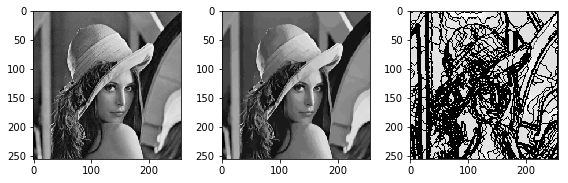

In [13]:
plt.figure(figsize = (8, 3))
plt.subplot(131)
plt.imshow(D2.array_to_image(U_weick[0], N+2, M+2), cmap = "gray")
plt.subplot(132)
plt.imshow(D2.array_to_image(U_weick[-1], N+2, M+2), cmap = "gray")
plt.subplot(133)
plt.imshow(Gend.reshape(M+2, N+2), cmap = "gray")
plt.tight_layout()
plt.savefig("./figures/edge_detecion.png")
plt.show()

## Image Denoising

### Grayscale

In [20]:
M, N = 254, 254
K = (M+2)*(N+2)

T = 10000
# dt = 1e-3
dt = 1/T

imname = "lena-256x256.jpg"
I0 = D2.load_image("./images/"+imname, (M+2, N+2))
I = D2.add_noise2D(np.array(I0), scale = 25)

c = 1
funcnum = 1
g = func.choose_function(funcnum, c = 5)
U_weick = D2.solve_BE(I.reshape(K), g, M, N, T, dt)

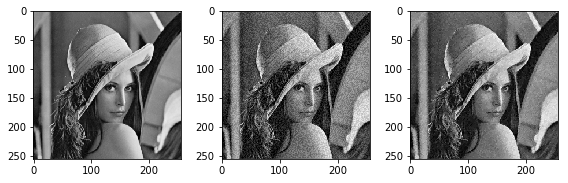

In [21]:
plt.figure(figsize = (8, 3))
plt.subplot(131)
plt.imshow(I0.astype("uint8"), cmap = "gray")
plt.subplot(132)
plt.imshow(D2.array_to_image(U_weick[0], N+2, M+2), cmap = "gray")
plt.subplot(133)
plt.imshow(D2.array_to_image(U_weick[-1], N+2, M+2), cmap = "gray")
plt.tight_layout()
plt.savefig("./figures/grayscale_denoising.png")
plt.show()

## Colour

In [16]:
M, N = 254, 254
# M, N = 126, 126
K = (M+2)*(N+2)

T = 10000
# dt = 1e-3
dt = 1/T

imname = "lena-color.jpg"
I0 = D2.load_image("./images/"+imname, (M+2, N+2))
I = D2.add_noise2D(np.array(I0), scale = 30)

# c = 0.1
# funcnum = 1
# g = func.choose_function(funcnum, c)
# U_rat = D2.solve_BE(I.reshape(K, 3), g, M, N, T, dt)

c = 1
funcnum = 1
g = func.choose_function(funcnum, c = 6)
U_weick = D2.solve_RGB_BE(D2.add_noise2D(I, scale = 30).reshape(K, 3), g, M, N, T, dt)

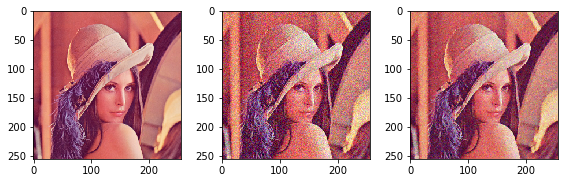

In [17]:
plt.figure(figsize = (8, 3))#figsize = (20, 14))
plt.subplot(131)
plt.imshow(I0.astype("uint8"))
plt.subplot(132)
plt.imshow(D2.array_to_image(U_weick[0], N+2, M+2))
plt.subplot(133)
plt.imshow(D2.array_to_image(U_weick[-1], N+2, M+2))
plt.tight_layout()
plt.savefig("./figures/colour_denoising.png")
plt.show()

# D2.before_after_2D(U, N, M, savename = D2.savename(imname, M+2, N+2, T, dt, funcnum))